In [1]:
import numpy as np 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('whitegrid')

### Generate samples

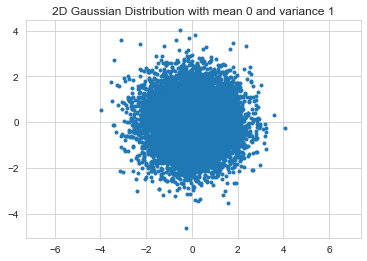

(2, 10000)

In [2]:
count = 10000
mean = [0, 0]
cov = [[1, 0], [0, 1]]
x, y = np.random.multivariate_normal(mean, cov, count).T
X = np.array([x, y]).T
plt.plot(x, y, '.')
plt.axis('equal')
plt.title('2D Gaussian Distribution with mean 0 and variance 1')
plt.show()
X = X.T
X.shape

### Custom M

[[ 2.82842712 -0.28284271]
 [ 2.82842712  0.28284271]]


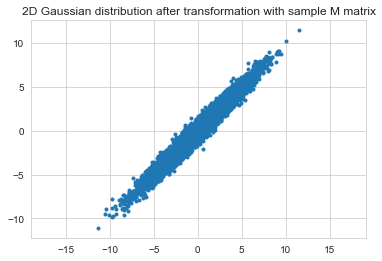

In [3]:
ScalingMatrix = np.array([[4, 0], [0, 0.4]])
RotatingMatrix = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)], [np.sin(np.pi/4), np.cos(np.pi/4)]])
M = np.dot(RotatingMatrix, ScalingMatrix)
print(M)
newX = np.dot(M, X)
plt.plot(newX[0], newX[1], '.')
plt.axis('equal')
plt.title('2D Gaussian distribution after transformation with sample M matrix')
plt.show()

In [4]:
# svd decomposition for matrix M
U_M, S_M, V_M = np.linalg.svd(M)

#svd decomposition for matrix X
U_X, S_X, V_X = np.linalg.svd(X)

# svd decomposition for matrix newX(y)
U_Y, S_Y, V_Y = np.linalg.svd(newX)

# svd decomposition for matrix covarience matrix of newX
U_C, S_C, V_C = np.linalg.svd(np.cov(newX))

### Part A

#### First section

In [5]:
np.diag(S_C),np.diag(S_M**2)

(array([[16.16690675,  0.        ],
        [ 0.        ,  0.16081937]]),
 array([[16.  ,  0.  ],
        [ 0.  ,  0.16]]))

#### Second section

In [6]:
U_C,U_M

(array([[-0.7071487 , -0.70706486],
        [-0.70706486,  0.7071487 ]]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

### Part B

In [7]:
S_Y,S_M * np.mean(S_X)

(array([402.06107626,  40.10540379]), array([401.5575755 ,  40.15575755]))

### Part C

In [8]:
Y1 = np.array(pd.read_csv("./P2/Y1.csv")).T
Y2 = np.array(pd.read_csv("./P2/Y2.csv")).T

x, y = np.random.multivariate_normal(mean, cov, 50000).T
X = np.array([x, y])

C1 = np.cov(Y1)
C2 = np.cov(Y2)

U_C1, S_C1, V_C1 = np.linalg.svd(C1)
U_C2, S_C2, V_C2 = np.linalg.svd(C2)

S_M = np.sqrt(S_C1)
U_M = U_C1 
V_M = U_C2

In [9]:
print(U_M.shape,S_M.shape,V_M.shape)
M = np.dot(np.dot(U_M,np.diag(S_M)),V_M.T)
M

(2, 2) (2,) (2, 2)


array([[6.01864836, 1.00359787],
       [6.02101203, 1.99876244]])

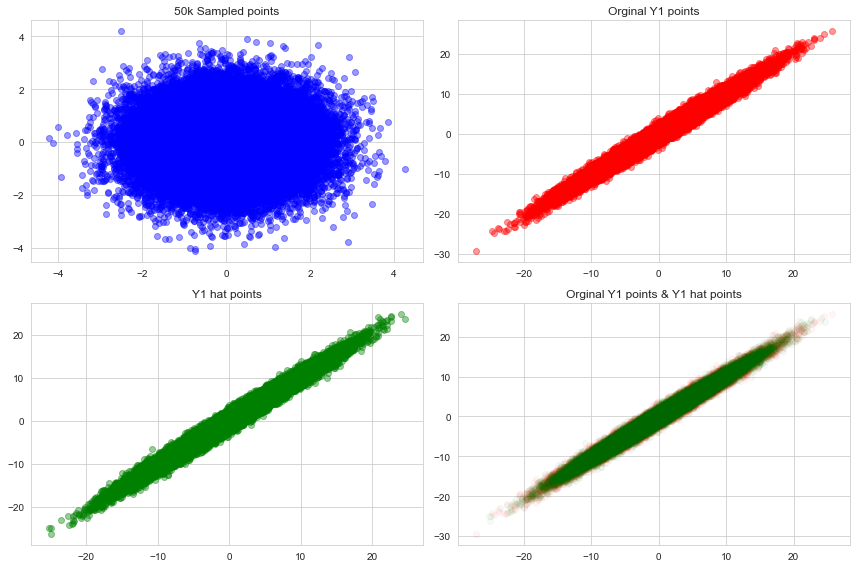

In [13]:
W,H,I = 2,2,1
Y1_hat = np.dot(M,X)
Y2_hat = np.dot(M.T,X)

plt.rcParams["figure.figsize"]= (12,8)

plt.subplot(W,H,I)
I += 1
plt.scatter(X[0], X[1],color="blue",alpha=0.4)
plt.title("50k Sampled points")

plt.subplot(W,H,I)
I += 1
plt.scatter(Y1[0], Y1[1],color="red",alpha=0.4)
plt.title("Orginal Y1 points")

plt.subplot(W,H,I)
I += 1
plt.scatter(Y1_hat[0], Y1_hat[1],color="green",alpha=0.4)
plt.title("Y1 hat points")


plt.subplot(W,H,I)
I += 1
plt.scatter(Y1[0], Y1[1],color="red",alpha=0.04)
plt.scatter(Y1_hat[0], Y1_hat[1],color="green",alpha=0.04)
plt.title("Orginal Y1 points & Y1 hat points")

plt.tight_layout()
plt.show()

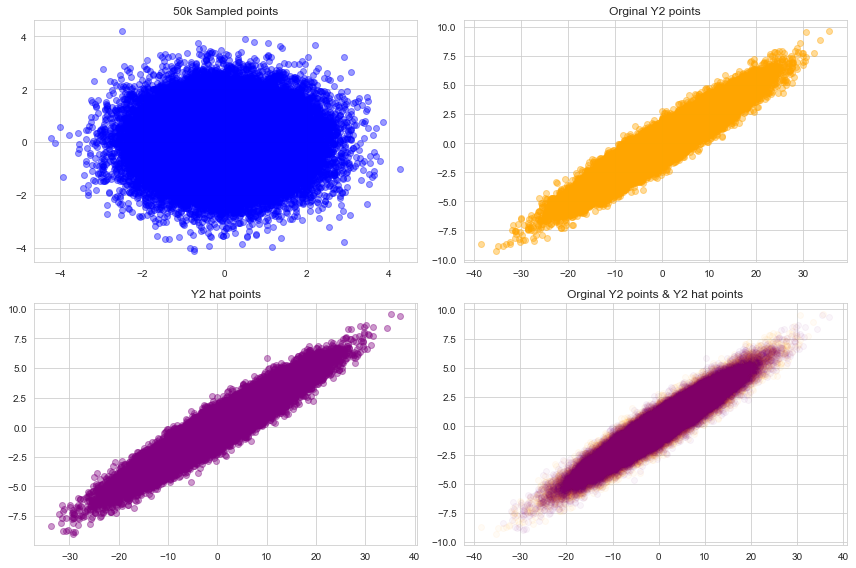

In [14]:
I = 1
plt.subplot(W,H,I)
I += 1
plt.scatter(X[0], X[1],color="blue",alpha=0.4)
plt.title("50k Sampled points")

plt.subplot(W,H,I)
I += 1
plt.scatter(Y2[0], Y2[1],color="orange",alpha=0.4)
plt.title("Orginal Y2 points")

plt.subplot(W,H,I)
I += 1
plt.scatter(Y2_hat[0], Y2_hat[1],color="purple",alpha=0.4)
plt.title("Y2 hat points")


plt.subplot(W,H,I)
I += 1
plt.scatter(Y2[0], Y2[1],color="orange",alpha=0.04)
plt.scatter(Y2_hat[0], Y2_hat[1],color="purple",alpha=0.04)
plt.title("Orginal Y2 points & Y2 hat points")

plt.tight_layout()
plt.show()